# Exploratory data analysis

### 1. Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

pd.set_option("display.float_format", "{:.1f}".format)

### 2. Exploring your data

#### Read cleaned data from file

In [2]:
cleaned_df = pd.read_csv("./Data/PROCESSED_heating-gas-consumption-and-cost.csv")
cleaned_df.head()

,Development Name,Borough,Location,Funding Source,Vendor Name,Revenue Month,Service Start Date,Service End Date,# days,Current Charges,Consumption (Therms)
0,ADAMS,BRONX,BLD 04,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,78293.0,136632.0
1,ADAMS,BRONX,BLD 04,FEDERAL,HESS CORPORATION (905243) - 2,2010-01-01,2009-12-25,2010-01-26,32,133779.5,136632.0
2,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,National Grid NYC,2010-01-01,2009-12-29,2010-01-28,30,44335.2,153899.2
3,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,National Grid NYC,2010-01-01,2009-12-29,2010-01-28,30,22034.9,76488.8
4,AMSTERDAM,MANHATTAN,BLD 02,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,95456.6,169137.0


#### How many rows and how many columns does the data have?

In [4]:
shape = cleaned_df.shape
print("The number of row:", cleaned_df.shape[0])
print("The number of column:", cleaned_df.shape[1])
if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

The number of row: 179595
The number of column: 11
Your data good!.


#### Type of dataset.

In [5]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179595 entries, 0 to 179594
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Development Name      179595 non-null  object 
 1   Borough               179595 non-null  object 
 2   Location              179595 non-null  object 
 3   Funding Source        179595 non-null  object 
 4   Vendor Name           179595 non-null  object 
 5   Revenue Month         179595 non-null  object 
 6   Service Start Date    179595 non-null  object 
 7   Service End Date      179595 non-null  object 
 8   # days                179595 non-null  int64  
 9   Current Charges       179595 non-null  float64
 10  Consumption (Therms)  179595 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.1+ MB


#### Convert the data type appropriately
- `Revenue Month`, `Service Start Date`, `Service End Date`: datetime

In [7]:
cleaned_df['Revenue Month'] = pd.to_datetime(cleaned_df['Revenue Month'], format='%Y-%m-%d')
cleaned_df['Service Start Date'] = pd.to_datetime(cleaned_df['Service Start Date'], format='%Y-%m-%d')
cleaned_df['Service End Date'] = pd.to_datetime(cleaned_df['Service End Date'], format='%Y-%m-%d')

Summarize all descriptive statistics, variance, standard deviation, coefficient of variation, kurtosis, moments, covariance and correlation values

In [16]:
df_copy = cleaned_df[['# days', 'Current Charges', 'Consumption (Therms)']]
# Tính toán các thông số thống kê
descriptive_stats = df_copy.describe()

# Phương sai và độ lệch chuẩn
variance = df_copy.var()
std_dev = df_copy.std()

# Hệ số biến động
coeff_of_variation = (std_dev / descriptive_stats.loc['mean']) * 100

# Skewness
skewness = skew(df_copy)

# Kurtosis
kurt = kurtosis(df_copy)

# Moments
moments = df_copy.mad()

# Covariance và Correlation
covariance = df_copy.cov()
correlation = df_copy.corr()

combined_stats = pd.DataFrame({
    'Mean': descriptive_stats.loc['mean'],
    'Median': descriptive_stats.loc['50%'],
    'Std Deviation': std_dev,
    'Variance': variance,
    'Coeff of Variation': coeff_of_variation,
    'Skewness': skewness,
    'Kurtosis': kurt,
    'Moments': moments
})

combined_stats = pd.concat([combined_stats, covariance.add_prefix('Cov_'), correlation.add_prefix('Corr_')], axis=1)

print(combined_stats)


                        Mean  Median  Std Deviation     Variance  \
# days                  30.2    30.0            8.7         75.2   
Current Charges      10519.6  1311.5        26460.9  700177383.8   
Consumption (Therms) 21095.3  2450.0        49961.3 2496126700.7   

                      Coeff of Variation  Skewness  Kurtosis  Moments  \
# days                              28.7      24.8    1114.7      2.3   
Current Charges                    251.5       5.9      73.1  13967.8   
Consumption (Therms)               236.8       5.3      79.6  28033.5   

                      Cov_# days  Cov_Current Charges  \
# days                      75.2              13576.8   
Current Charges          13576.8          700177383.8   
Consumption (Therms)     24776.5         1241172302.5   

                      Cov_Consumption (Therms)  Corr_# days  \
# days                                 24776.5          1.0   
Current Charges                   1241172302.5          0.1   
Consumption (The

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

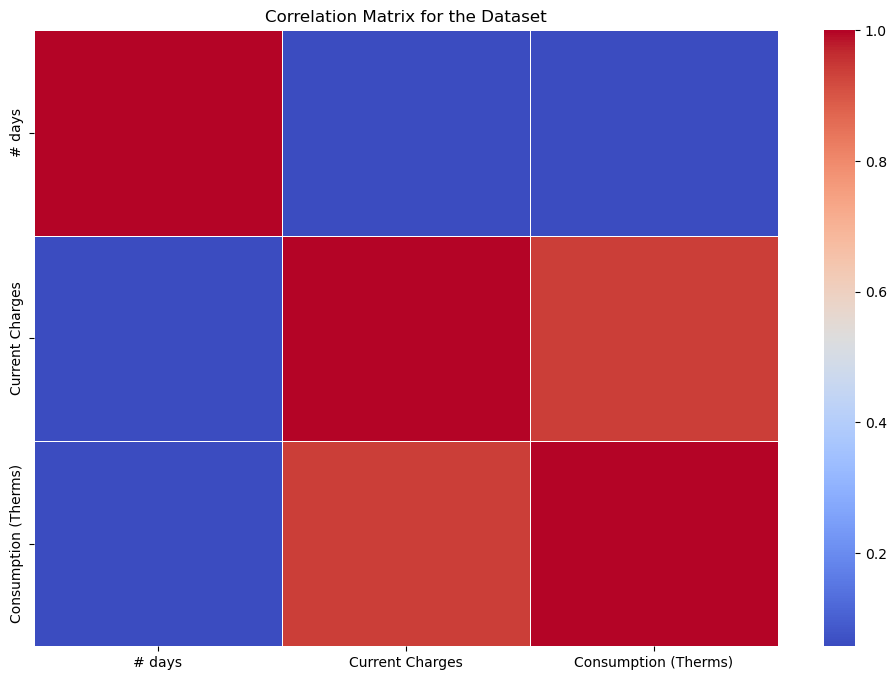

In [17]:
correlation_matrix = cleaned_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for the Dataset")
plt.show()